In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/marketingcampaigns_clean.csv')

In [4]:
df


,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue,net_profit,z_score_budget,z_score_roi,cost_per_conversion,is_profitable
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.30,0.35,email,B2B,organic,87.795984,709593.48,701511.18,-0.163249,-0.709075,92.06,True
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,29.165567,516609.10,498896.12,-0.132470,0.782885,607.33,True
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.10,0.37,podcast,B2B,paid,5.413642,458227.42,373584.32,0.081433,-0.632564,15635.15,True
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,6.165886,89958.73,75368.98,-0.142452,-0.250010,2366.21,True
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.90,0.30,social media,B2B,promotion,1.209189,47511.35,8219.45,-0.063506,-0.900352,32494.41,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,Multi-lateral dedicated workforce,2023-06-15,2024-06-15,94084.21,0.58,podcast,B2B,referral,4.320839,406522.77,312438.56,0.111606,0.170799,21774.52,True
1016,Cross-platform demand-driven encoding,2023-07-21,2023-11-04,64041.37,0.16,social media,B2B,promotion,2.724215,174462.47,110421.10,0.015591,-1.435928,23508.19,True
1017,Future campaign,2025-01-01,2025-06-01,75000.00,0.90,webinar,B2C,promotion,2.666667,200000.00,125000.00,0.050614,1.394972,28125.00,True
1018,Overlapping dates,2023-03-01,2022-12-31,60000.00,0.60,webinar,B2B,paid,1.500000,90000.00,30000.00,0.002676,0.247310,40000.00,True


In [5]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   campaign_name        1020 non-null   object 
 1   start_date           1020 non-null   object 
 2   end_date             1020 non-null   object 
 3   budget               1020 non-null   float64
 4   roi                  1020 non-null   float64
 5   type                 1020 non-null   object 
 6   target_audience      1020 non-null   object 
 7   channel              1020 non-null   object 
 8   conversion_rate      1020 non-null   float64
 9   revenue              1020 non-null   float64
 10  net_profit           1020 non-null   float64
 11  z_score_budget       1020 non-null   float64
 12  z_score_roi          1020 non-null   float64
 13  cost_per_conversion  1020 non-null   float64
 14  is_profitable        1020 non-null   bool   
dtypes: bool(1), float64(8), object(6)
memo

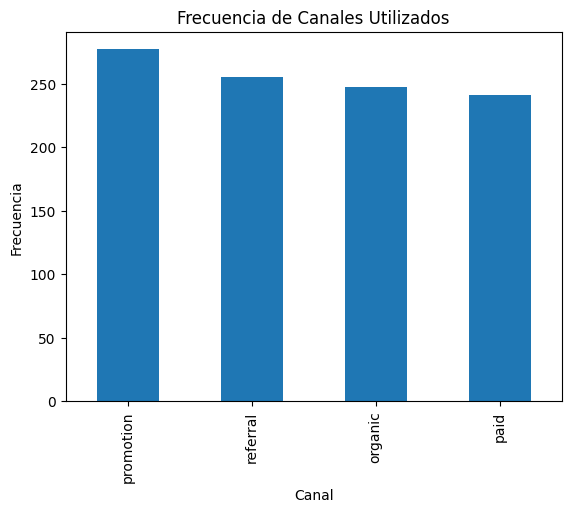

In [6]:
# Sacame una gráfica de barras mostrandome que channel es utilizado con mayor frecuencia
df['channel'].value_counts().plot(kind='bar')
plt.title('Frecuencia de Canales Utilizados')
plt.xlabel('Canal')
plt.ylabel('Frecuencia')
plt.show()

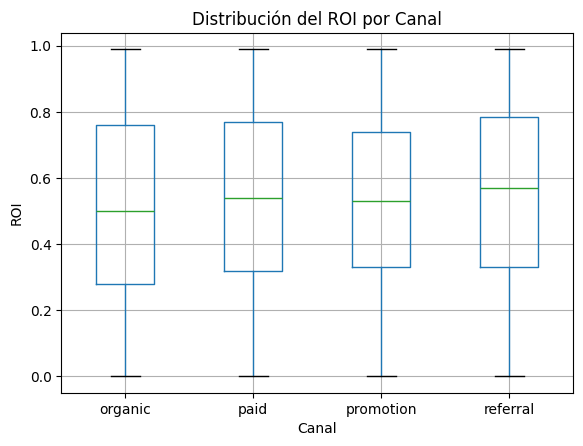

In [7]:
# Hazme un diagrama de caja para la distribución del roi por channel
df.boxplot(column='roi', by='channel')
plt.title('Distribución del ROI por Canal')
plt.suptitle('')  # Remove the default title to avoid overlap
plt.xlabel('Canal')
plt.ylabel('ROI')
plt.show()

In [8]:
# Cálculos adicionales si es necesario
df['is_profitable'] = df['net_profit'] > 0  # Aseguramos que esta columna es booleana

# Cálculo de la campaña con más ingresos
campaña_más_ingresos = df.loc[df['revenue'].idxmax()]

# Cálculo de la campaña con mejor tasa de conversión
campaña_mejor_conversion = df.loc[df['conversion_rate'].idxmax()]

# Calcular métricas promedio por tipo de campaña
promedio_ingresos = df.groupby('type')['revenue'].mean()
promedio_conversiones = df.groupby('type')['conversion_rate'].mean()
promedio_roi = df.groupby('type')['roi'].mean()

# Imprimir resultados clave
print(f"Campaña con más ingresos: {campaña_más_ingresos['campaign_name']} ({campaña_más_ingresos['revenue']} ingresos)")
print(f"Campaña con mejor tasa de conversión: {campaña_mejor_conversion['campaign_name']} ({campaña_mejor_conversion['conversion_rate']} tasa de conversión)")



Campaña con más ingresos: Realigned radical hardware (999712.49 ingresos)
Campaña con mejor tasa de conversión: Persevering zero administration interface (885.758999401465 tasa de conversión)


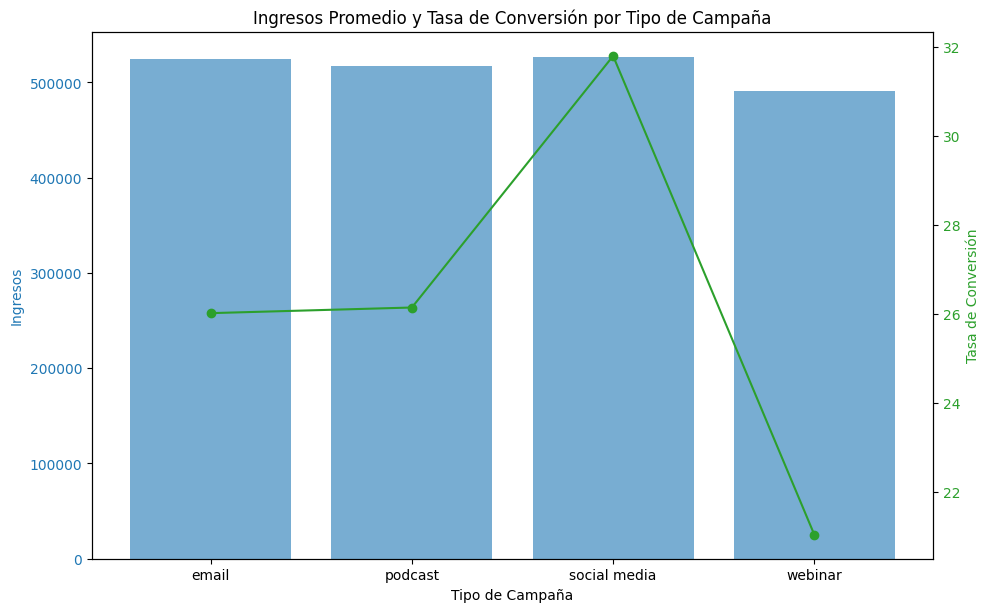

In [9]:
# Visualización: Gráfico de barras de ingresos promedio y tasa de conversión por tipo de campaña
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Tipo de Campaña')
ax1.set_ylabel('Ingresos', color='tab:blue')
ax1.bar(promedio_ingresos.index, promedio_ingresos.values, color='tab:blue', alpha=0.6, label='Ingresos Promedio')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Tasa de Conversión', color='tab:green')
ax2.plot(promedio_conversiones.index, promedio_conversiones.values, color='tab:green', marker='o', label='Tasa de Conversión')
ax2.tick_params(axis='y', labelcolor='tab:green')

fig.tight_layout()
plt.title('Ingresos Promedio y Tasa de Conversión por Tipo de Campaña')
plt.show()

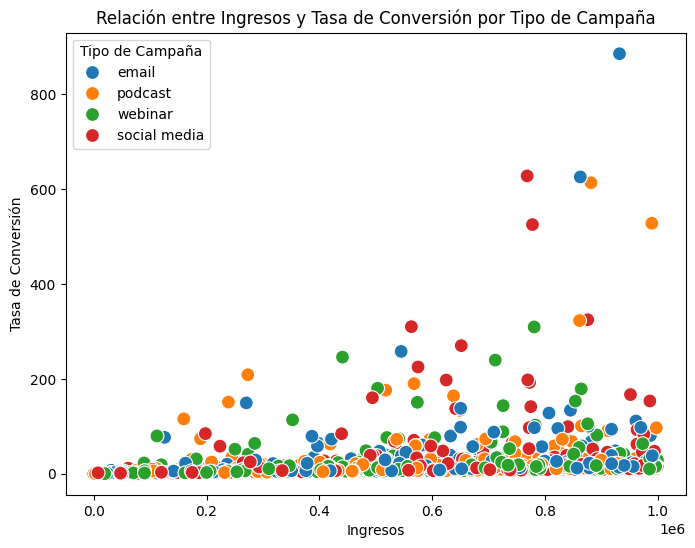

In [10]:
# Visualización: Diagrama de dispersión de Ingresos vs. Tasa de Conversión
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['revenue'], y=df['conversion_rate'], hue=df['type'], s=100)
plt.title('Relación entre Ingresos y Tasa de Conversión por Tipo de Campaña')
plt.xlabel('Ingresos')
plt.ylabel('Tasa de Conversión')
plt.legend(title='Tipo de Campaña')
plt.show()

C:\Users\carle\AppData\Local\Temp\ipykernel_22032\2784430429.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_profitable', data=df, palette='Set2')


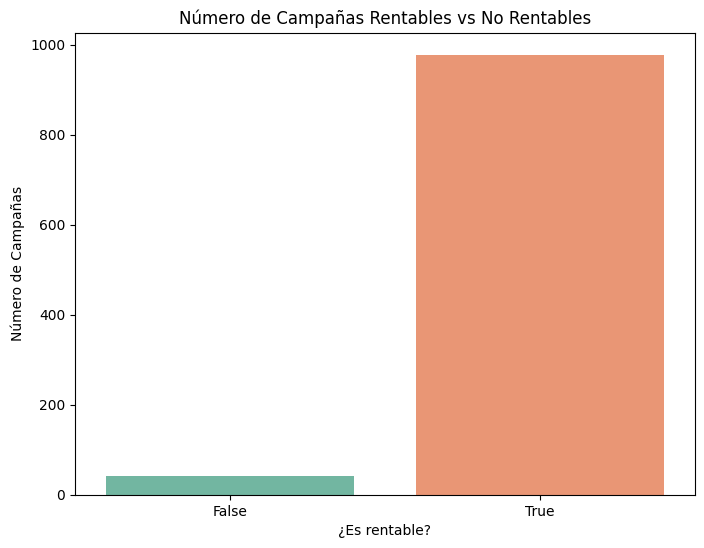

In [11]:
# Análisis de rentabilidad: campañas rentables
campañas_rentables = df[df['is_profitable']]

# Visualización: Gráfico de barras para campañas rentables vs no rentables
plt.figure(figsize=(8, 6))
sns.countplot(x='is_profitable', data=df, palette='Set2')
plt.title('Número de Campañas Rentables vs No Rentables')
plt.xlabel('¿Es rentable?')
plt.ylabel('Número de Campañas')
plt.show()

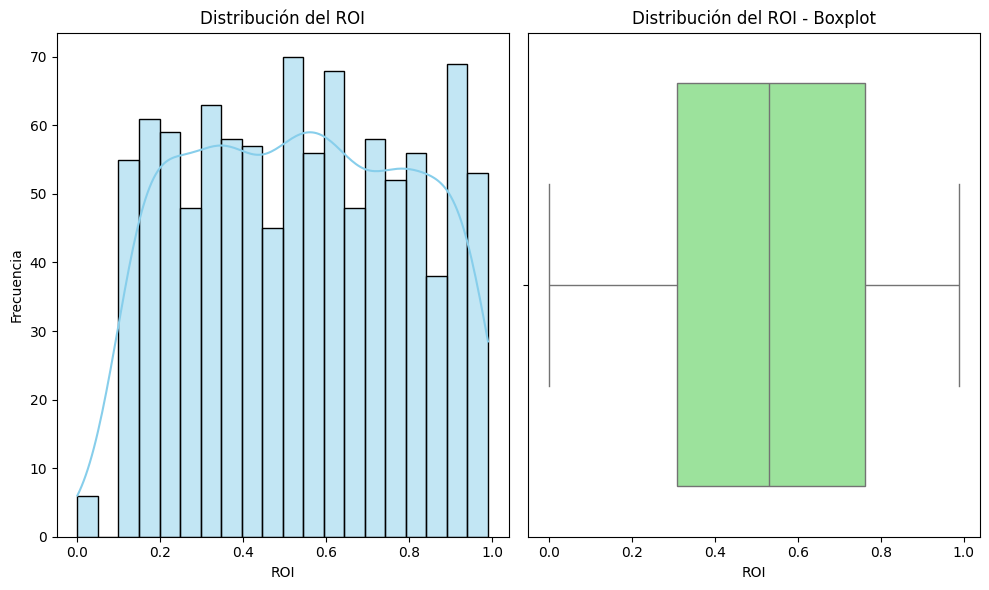

In [12]:
# 1. Distribución del ROI: Histograma y Boxplot
plt.figure(figsize=(10, 6))

# Histograma del ROI
plt.subplot(1, 2, 1)
sns.histplot(df['roi'], bins=20, kde=True, color='skyblue')
plt.title('Distribución del ROI')
plt.xlabel('ROI')
plt.ylabel('Frecuencia')

# Boxplot del ROI
plt.subplot(1, 2, 2)
sns.boxplot(x=df['roi'], color='lightgreen')
plt.title('Distribución del ROI - Boxplot')
plt.xlabel('ROI')

plt.tight_layout()
plt.show()


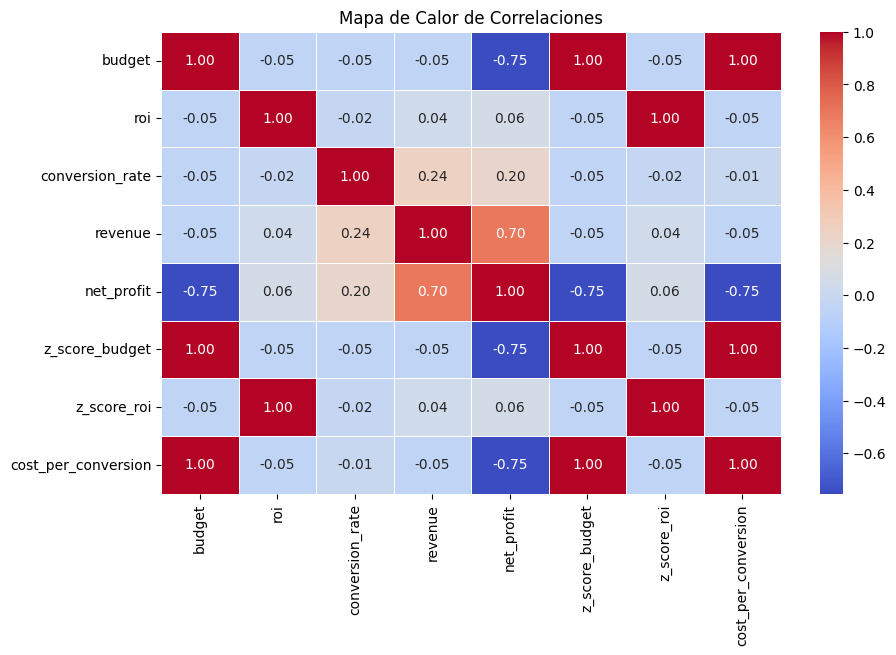

In [13]:
# 2. Correlaciones y Heatmap
# Seleccionamos solo las columnas numéricas para calcular la matriz de correlación
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

# Heatmap de correlaciones
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()


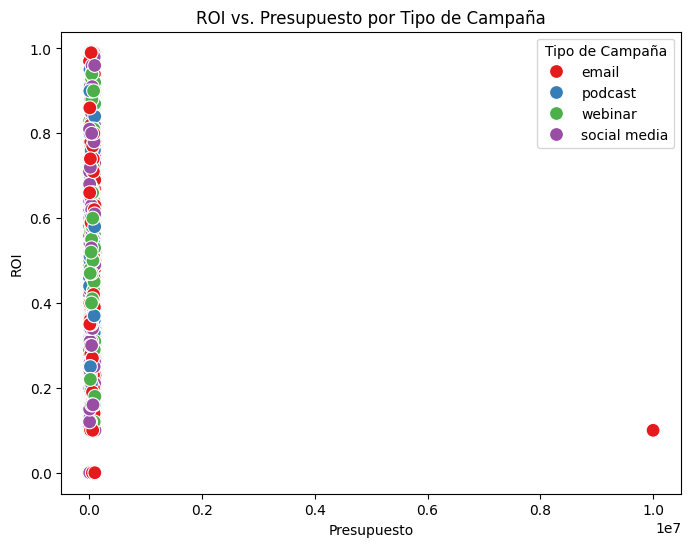

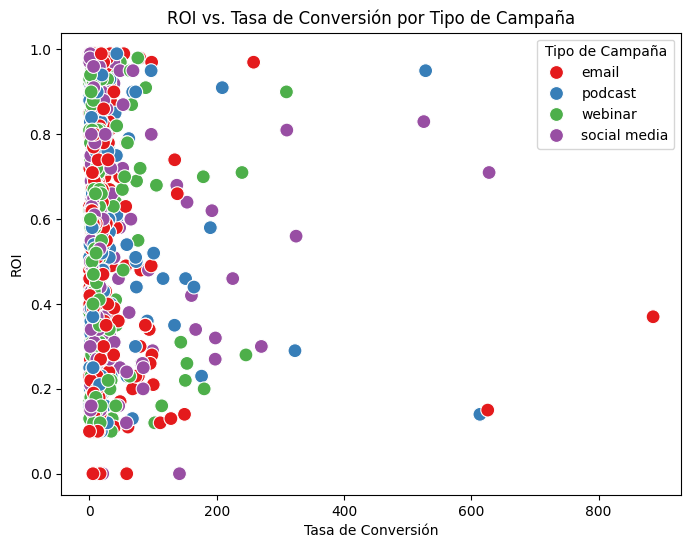

C:\Users\carle\AppData\Local\Temp\ipykernel_22032\2673306167.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='channel', y='roi', data=df, palette='Set2')


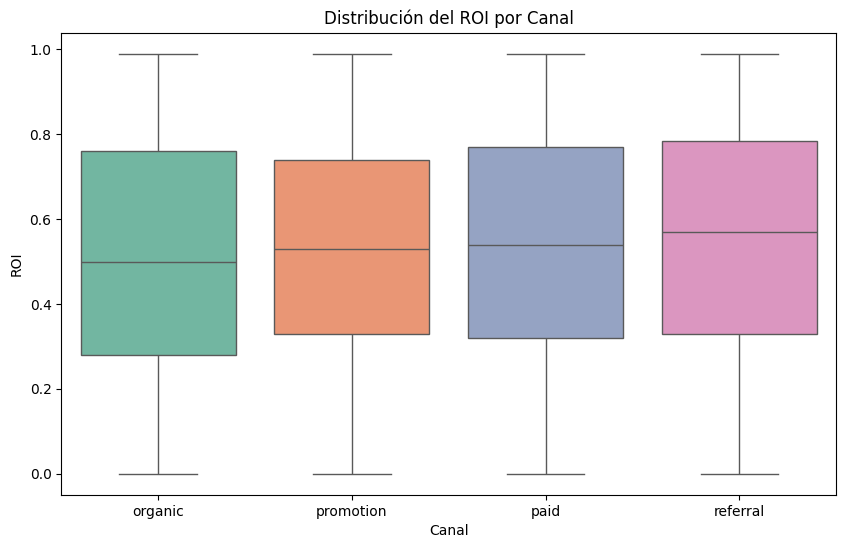

In [14]:
# 3. Análisis de factores asociados con ROI alto
# Analizamos cómo el ROI se distribuye según variables categóricas como 'canal', 'tipo', 'audience', etc.

# Gráfico de dispersión de ROI vs. Presupuesto
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['budget'], y=df['roi'], hue=df['type'], palette='Set1', s=100)
plt.title('ROI vs. Presupuesto por Tipo de Campaña')
plt.xlabel('Presupuesto')
plt.ylabel('ROI')
plt.legend(title='Tipo de Campaña')
plt.show()

# Gráfico de dispersión de ROI vs. Conversion Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['conversion_rate'], y=df['roi'], hue=df['type'], palette='Set1', s=100)
plt.title('ROI vs. Tasa de Conversión por Tipo de Campaña')
plt.xlabel('Tasa de Conversión')
plt.ylabel('ROI')
plt.legend(title='Tipo de Campaña')
plt.show()

# Gráfico de boxplot del ROI por Canal
plt.figure(figsize=(10, 6))
sns.boxplot(x='channel', y='roi', data=df, palette='Set2')
plt.title('Distribución del ROI por Canal')
plt.xlabel('Canal')
plt.ylabel('ROI')
plt.show()


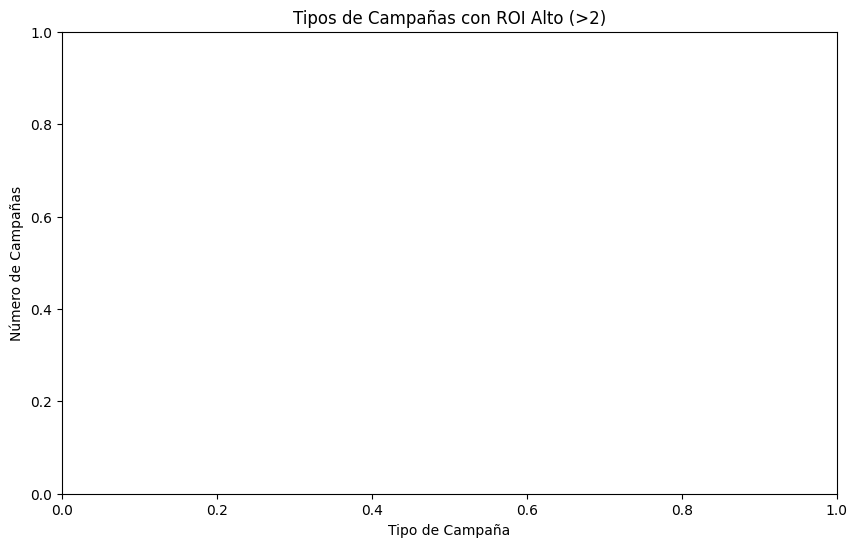

C:\Users\carle\AppData\Local\Temp\ipykernel_22032\711813697.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target_audience', y='roi', data=df, palette='Set1')


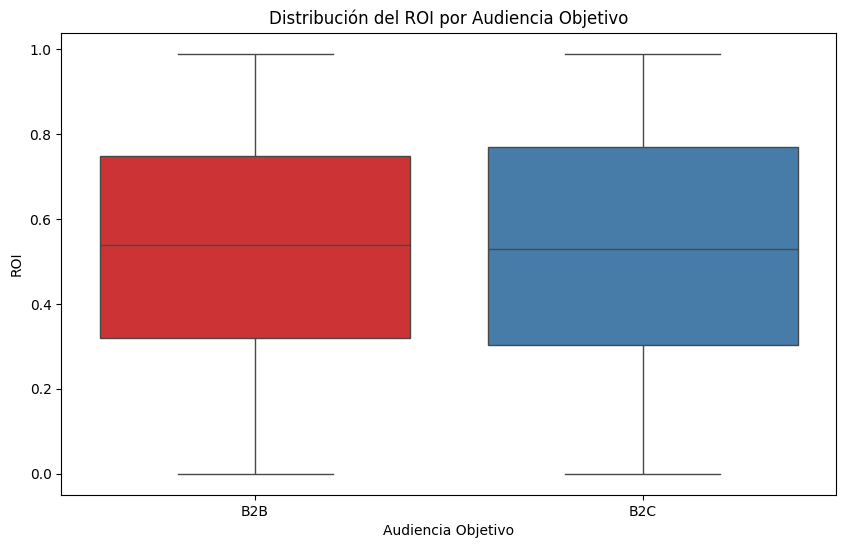

In [ ]:
# 4. Identificación de campañas con alto ROI (Segmentos de alto rendimiento)
# Filtramos campañas con ROI alto, por ejemplo, ROI > 2
high_roi_campaigns = df[df['roi'] > 2]

# Visualización de campañas con ROI alto
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=high_roi_campaigns, palette='Set3')
plt.title('Tipos de Campañas con ROI Alto (>2)')
plt.xlabel('Tipo de Campaña')
plt.ylabel('Número de Campañas')
plt.show()

# Análisis de la audiencia y ROI
plt.figure(figsize=(10, 6))
sns.boxplot(x='target_audience', y='roi', data=df, palette='Set1')
plt.title('Distribución del ROI por Audiencia Objetivo')
plt.xlabel('Audiencia Objetivo')
plt.ylabel('ROI')
plt.show()


C:\Users\carle\AppData\Local\Temp\ipykernel_22032\928745291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target_audience', y='conversion_rate', data=df, palette='Set2')


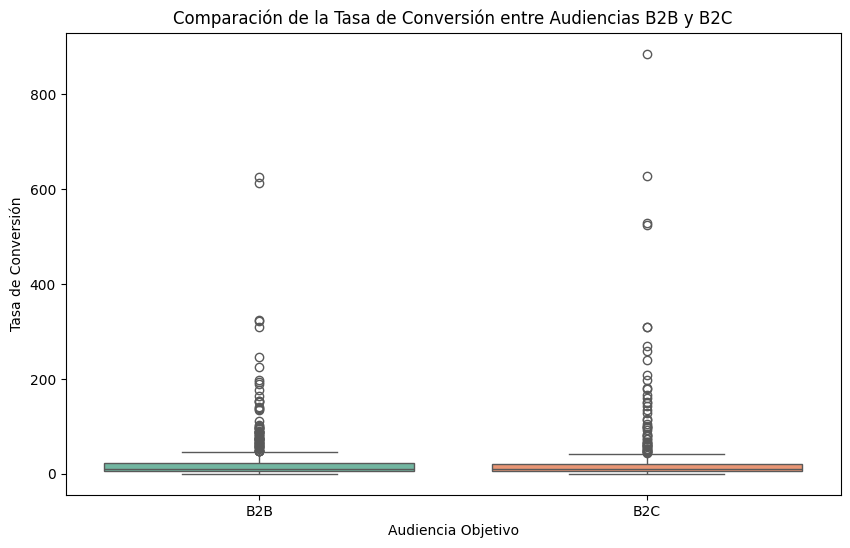

In [16]:
# 1. Comparación de la tasa de conversión entre audiencias B2B y B2C: Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='target_audience', y='conversion_rate', data=df, palette='Set2')
plt.title('Comparación de la Tasa de Conversión entre Audiencias B2B y B2C')
plt.xlabel('Audiencia Objetivo')
plt.ylabel('Tasa de Conversión')
plt.show()

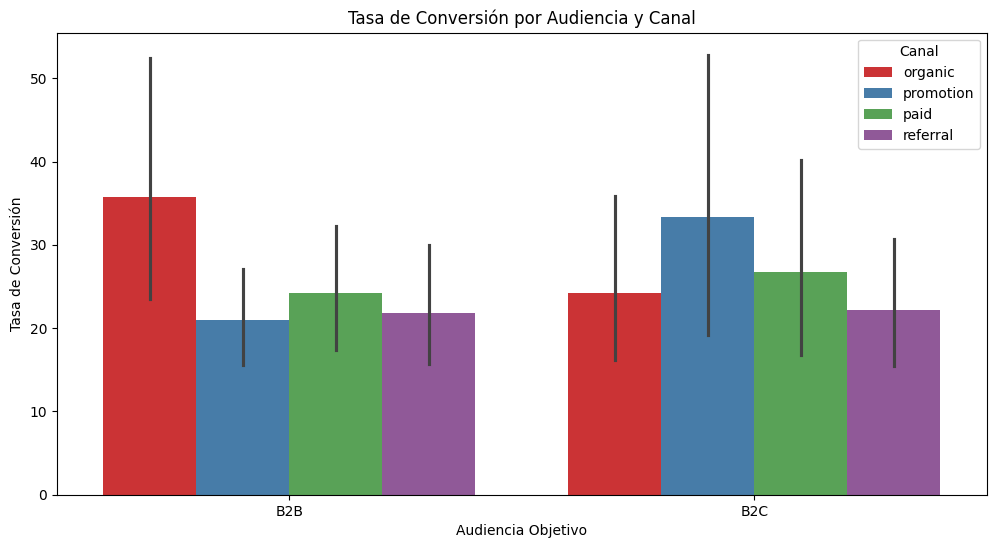

In [17]:
# 2. Análisis por subgrupos: Tasa de Conversión por Audiencia y Canal
plt.figure(figsize=(12, 6))
sns.barplot(x='target_audience', y='conversion_rate', hue='channel', data=df, palette='Set1')
plt.title('Tasa de Conversión por Audiencia y Canal')
plt.xlabel('Audiencia Objetivo')
plt.ylabel('Tasa de Conversión')
plt.legend(title='Canal')
plt.show()

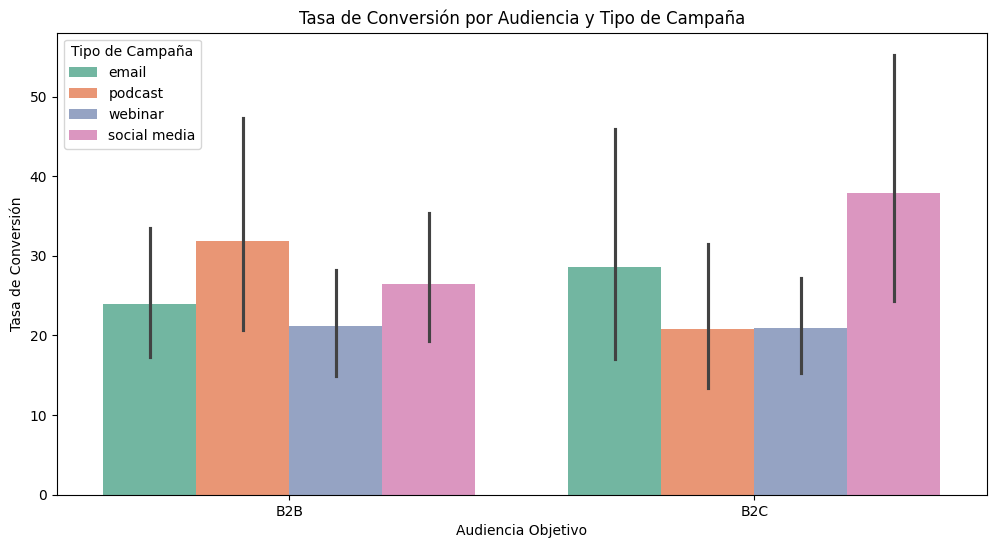

In [18]:
# 3. Análisis por subgrupos: Tasa de Conversión por Audiencia y Tipo de Campaña
plt.figure(figsize=(12, 6))
sns.barplot(x='target_audience', y='conversion_rate', hue='type', data=df, palette='Set2')
plt.title('Tasa de Conversión por Audiencia y Tipo de Campaña')
plt.xlabel('Audiencia Objetivo')
plt.ylabel('Tasa de Conversión')
plt.legend(title='Tipo de Campaña')
plt.show()

In [19]:
# 4. Test de hipótesis: Comparación estadística entre B2B y B2C
from scipy import stats

# Filtramos los datos por cada audiencia
b2b_conversions = df[df['target_audience'] == 'B2B']['conversion_rate']
b2c_conversions = df[df['target_audience'] == 'B2C']['conversion_rate']

# Realizamos un test T para comprobar si hay diferencias significativas entre las medias
t_stat, p_value = stats.ttest_ind(b2b_conversions, b2c_conversions)

print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

# Si el valor p es menor que 0.05, podemos rechazar la hipótesis nula y afirmar que hay una diferencia significativa.
if p_value < 0.05:
    print("Existen diferencias significativas entre la tasa de conversión de audiencias B2B y B2C.")
else:
    print("No existen diferencias significativas entre la tasa de conversión de audiencias B2B y B2C.")

Estadístico t: -0.2892843942673224
Valor p: 0.7724226558112413
No existen diferencias significativas entre la tasa de conversión de audiencias B2B y B2C.


C:\Users\carle\AppData\Local\Temp\ipykernel_22032\985091901.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='net_profit', y='campaign_name', data=top_campaigns, palette='viridis')


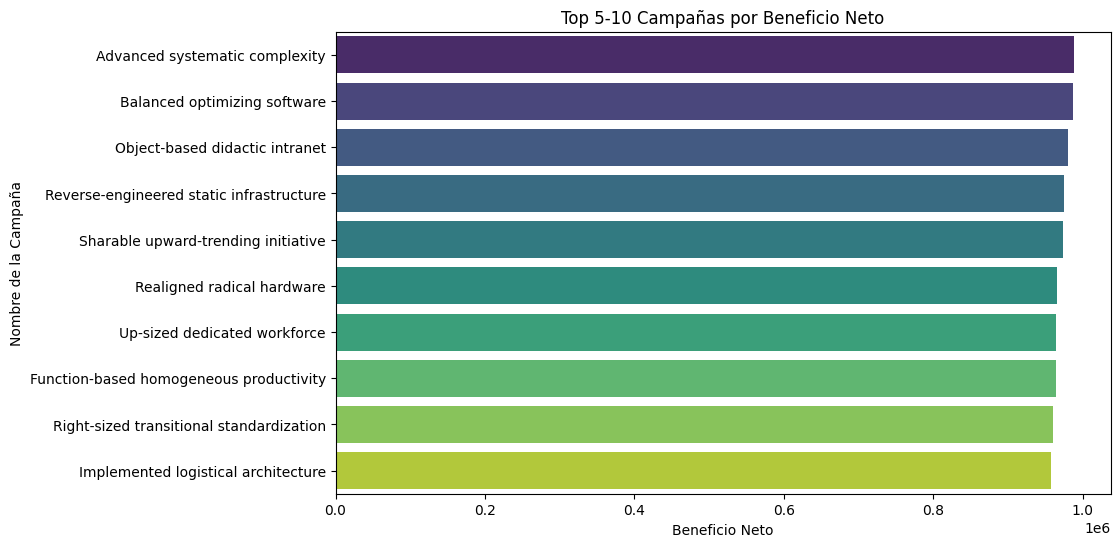

In [20]:
# 1. Ordenar por beneficio neto
top_campaigns = df.sort_values(by='net_profit', ascending=False).head(10)

# 2. Visualización de las top 5-10 campañas por beneficio neto
plt.figure(figsize=(10, 6))
sns.barplot(x='net_profit', y='campaign_name', data=top_campaigns, palette='viridis')
plt.title('Top 5-10 Campañas por Beneficio Neto')
plt.xlabel('Beneficio Neto')
plt.ylabel('Nombre de la Campaña')
plt.show()

In [21]:
# 3. Tabla con las top 5-10 campañas por beneficio neto
top_campaigns[['campaign_name', 'net_profit', 'budget', 'conversion_rate', 'channel', 'type', 'target_audience']]


,campaign_name,net_profit,budget,conversion_rate,channel,type,target_audience
492,Advanced systematic complexity,987859.73,1873.52,528.274718,organic,podcast,B2C
880,Balanced optimizing software,987359.82,10297.36,96.884753,paid,podcast,B2B
699,Object-based didactic intranet,979827.40,6430.70,153.367145,paid,social media,B2B
203,Reverse-engineered static infrastructure,974958.97,12246.32,80.612404,referral,email,B2B
193,Sharable upward-trending initiative,973355.11,20951.30,47.457982,organic,social media,B2C
170,Realigned radical hardware,965199.63,34512.86,28.966376,referral,webinar,B2B
902,Up-sized dedicated workforce,964497.81,26043.99,38.033412,organic,email,B2C
791,Function-based homogeneous productivity,963838.00,11711.34,83.299549,organic,social media,B2B
825,Right-sized transitional standardization,960202.70,9929.80,97.699098,promotion,email,B2C
907,Implemented logistical architecture,958135.52,15386.79,63.270007,organic,webinar,B2B


C:\Users\carle\AppData\Local\Temp\ipykernel_22032\2422500996.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target_audience', y='net_profit', data=top_campaigns, palette='Set2')


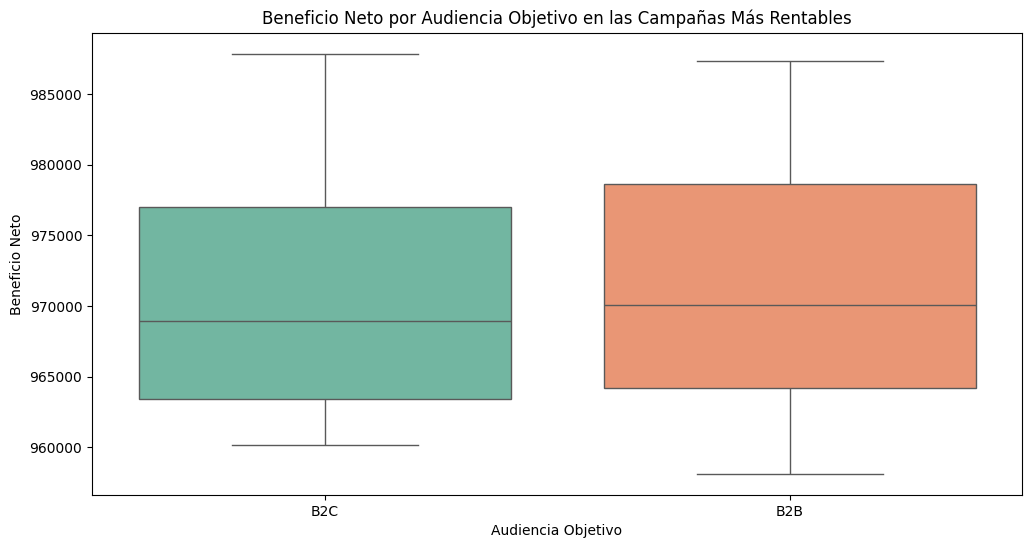

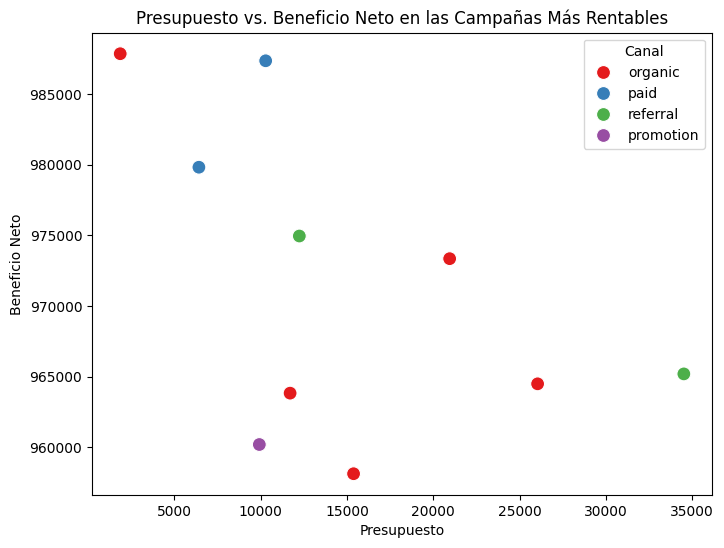

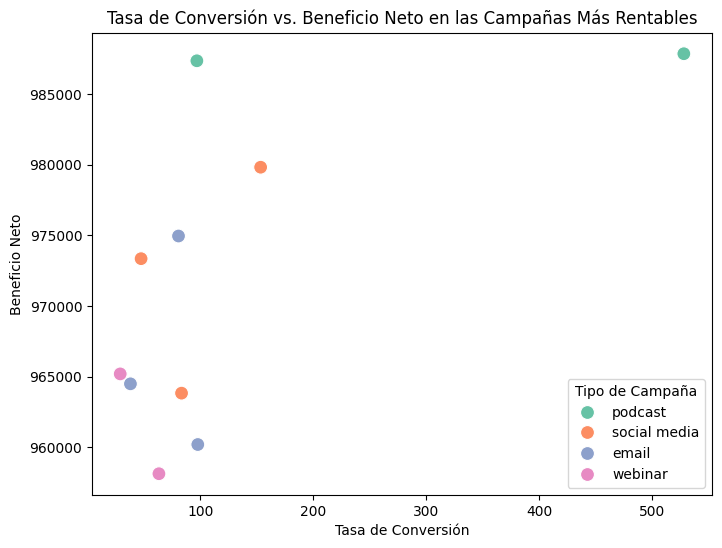

In [22]:
# 4. Análisis comparativo de características de las campañas más rentables
# Comparar beneficios netos con características clave
plt.figure(figsize=(12, 6))
sns.boxplot(x='target_audience', y='net_profit', data=top_campaigns, palette='Set2')
plt.title('Beneficio Neto por Audiencia Objetivo en las Campañas Más Rentables')
plt.xlabel('Audiencia Objetivo')
plt.ylabel('Beneficio Neto')
plt.show()

# Gráfico de la relación entre presupuesto y beneficio neto
plt.figure(figsize=(8, 6))
sns.scatterplot(x='budget', y='net_profit', data=top_campaigns, hue='channel', palette='Set1', s=100)
plt.title('Presupuesto vs. Beneficio Neto en las Campañas Más Rentables')
plt.xlabel('Presupuesto')
plt.ylabel('Beneficio Neto')
plt.legend(title='Canal')
plt.show()

# Gráfico comparativo de la tasa de conversión y beneficio neto
plt.figure(figsize=(8, 6))
sns.scatterplot(x='conversion_rate', y='net_profit', data=top_campaigns, hue='type', palette='Set2', s=100)
plt.title('Tasa de Conversión vs. Beneficio Neto en las Campañas Más Rentables')
plt.xlabel('Tasa de Conversión')
plt.ylabel('Beneficio Neto')
plt.legend(title='Tipo de Campaña')
plt.show()

In [23]:
# 1. Calcular la correlación entre presupuesto (budget) e ingresos (revenue)
correlation = df['budget'].corr(df['revenue'])
print(f"Correlación entre presupuesto e ingresos: {correlation}")

Correlación entre presupuesto e ingresos: -0.05223818560197598


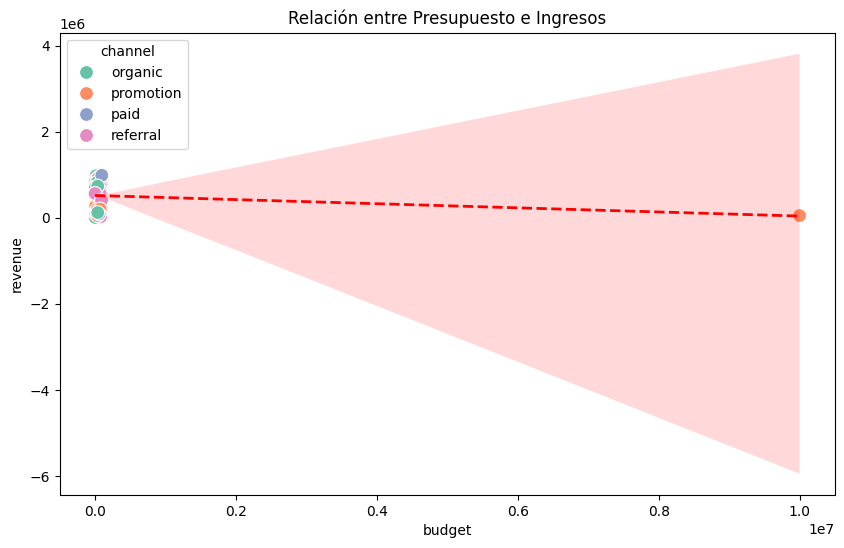

In [24]:
# 2. Gráfico de dispersión con línea de tendencia
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df, hue='channel', palette='Set2', s=100)
plt.title('Relación entre Presupuesto e Ingresos')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')

# Añadir una línea de tendencia (regresión lineal)
sns.regplot(x='budget', y='revenue', data=df, scatter=False, color='r', line_kws={'linewidth': 2, 'linestyle': '--'})
plt.show()


In [25]:
# 1. Filtrar las campañas que cumplen con los criterios: ROI > 0.5 e ingresos > 500,000
filtered_campaigns = df[(df['roi'] > 0.5) & (df['revenue'] > 500000)]
# 2. Visualización de la tabla filtrada
print(filtered_campaigns[['campaign_name', 'roi', 'revenue', 'net_profit', 'budget', 'channel', 'type']])


                                    campaign_name   roi    revenue  \
1              De-engineered analyzing task-force  0.74  516609.10   
5          Upgradable transitional data-warehouse  0.59  558302.11   
9                    Intuitive responsive support  0.81  563280.30   
12                  Networked even-keeled toolset  0.58  680416.90   
21    Self-enabling human-resource infrastructure  0.69  974038.96   
...                                           ...   ...        ...   
996     Multi-channeled 5thgeneration methodology  0.90  537274.20   
998                   Operative tangible firmware  0.80  613448.30   
1006           De-engineered analyzing task-force  0.74  516609.10   
1010       Upgradable transitional data-warehouse  0.59  558302.11   
1014                 Intuitive responsive support  0.81  563280.30   

      net_profit    budget    channel          type  
1      498896.12  17712.98  promotion         email  
5      482732.83  75569.28   referral  social media

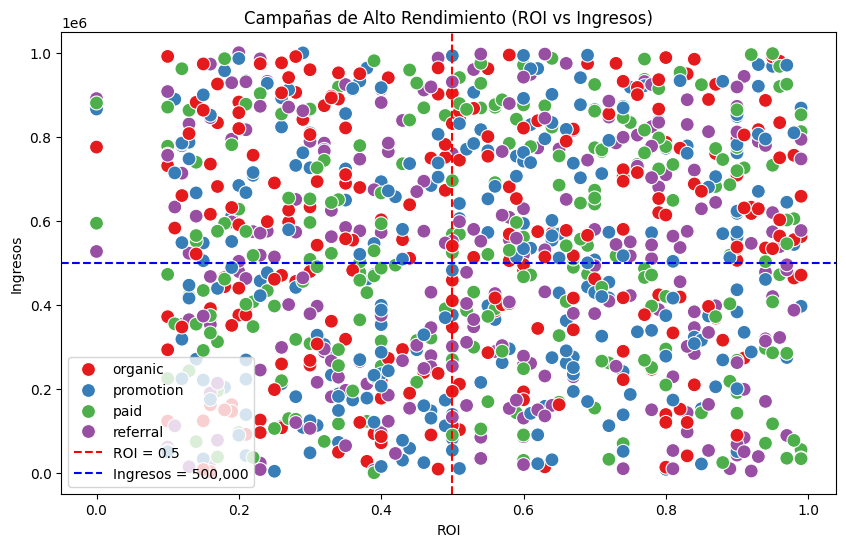

In [26]:
# 3. Gráfico de cuadrantes: Ingresos vs ROI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='roi', y='revenue', data=df, hue='channel', palette='Set1', s=100)
# Añadir líneas de referencia de cuadrantes  (ROI = 0.5 y Revenue = 500,000)
plt.axvline(x=0.5, color='r', linestyle='--', label='ROI = 0.5')
plt.axhline(y=500000, color='b', linestyle='--', label='Ingresos = 500,000')
plt.title('Campañas de Alto Rendimiento (ROI vs Ingresos)')
plt.xlabel('ROI')
plt.ylabel('Ingresos')
plt.legend()
plt.show()

In [27]:
# Convertir las fechas a formato datetime
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])
# Extraer componentes temporales: mes, trimestre, año
df['start_month'] = df['start_date'].dt.month
df['start_quarter'] = df['start_date'].dt.to_period('Q')
df['start_year'] = df['start_date'].dt.year

In [28]:
# 1. Análisis del rendimiento por mes (promedio de ingresos y ROI)
monthly_performance = df.groupby('start_month').agg(
    avg_revenue=('revenue', 'mean'),
    avg_roi=('roi', 'mean')
).reset_index()

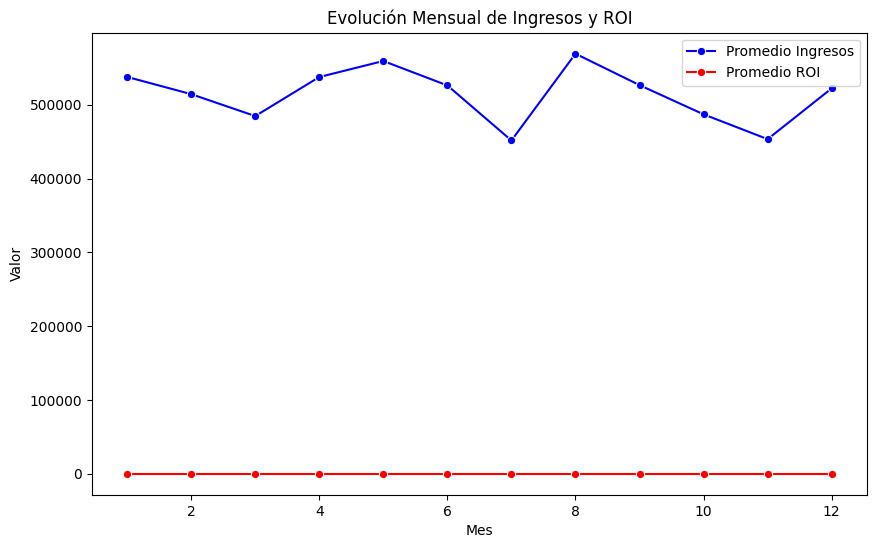

In [29]:
#2. Gráfico de líneas para ver la evolución mensual del rendimiento 
plt.figure(figsize=(10, 6))
sns.lineplot(x='start_month', y='avg_revenue', data=monthly_performance, marker='o', label='Promedio Ingresos', color='blue')
sns.lineplot(x='start_month', y='avg_roi', data=monthly_performance, marker='o', label='Promedio ROI', color='red')
plt.title('Evolución Mensual de Ingresos y ROI')
plt.xlabel('Mes')
plt.ylabel('Valor')
plt.legend()
plt.show()

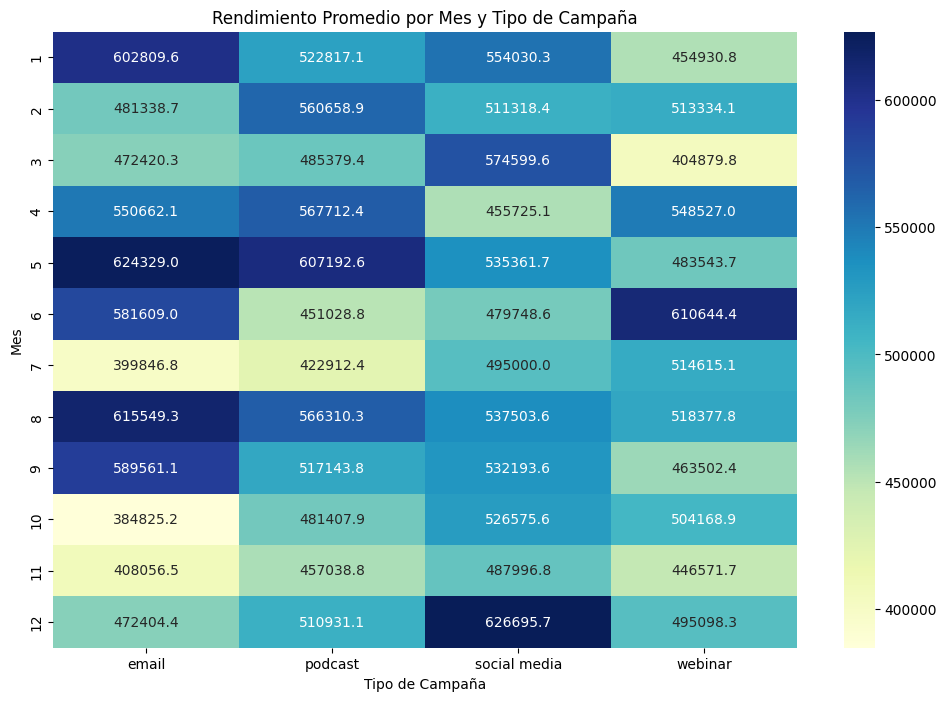

In [30]:
# 3. Heatmap de rendimiento por mes y tipo de campaña
monthly_type_performance = df.groupby(['start_month', 'type']).agg(
    avg_revenue=('revenue', 'mean'),
    avg_roi=('roi', 'mean')
).reset_index()
# Pivotar para crear el heatmap
monthly_type_pivot = monthly_type_performance.pivot(index='start_month', columns='type', values='avg_revenue')
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_type_pivot, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Rendimiento Promedio por Mes y Tipo de Campaña')
plt.xlabel('Tipo de Campaña')
plt.ylabel('Mes')
plt.show()

In [31]:
# 4. Análisis de rendimiento por trimestre
quarterly_performance = df.groupby('start_quarter').agg(
    avg_revenue=('revenue', 'mean'),
    avg_roi=('roi', 'mean')
).reset_index()

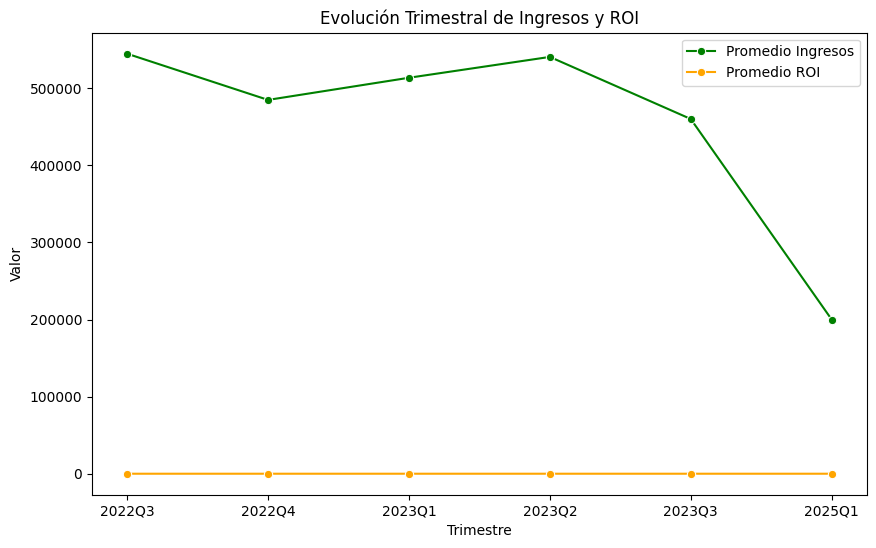

In [32]:
# 5. Grafico de lineas para la evolución trimestral del rendimiento
plt.figure(figsize=(10, 6))
sns.lineplot(x=quarterly_performance['start_quarter'].astype(str), y='avg_revenue', data=quarterly_performance, marker='o', label='Promedio Ingresos', color='green')
sns.lineplot(x=quarterly_performance['start_quarter'].astype(str), y='avg_roi', data=quarterly_performance, marker='o', label='Promedio ROI', color='orange')
plt.title('Evolución Trimestral de Ingresos y ROI')
plt.xlabel('Trimestre')
plt.ylabel('Valor')
plt.legend()
plt.show()